#Methodology

In [0]:
"""

Whats the purpose of the clustering?
What are we clustering on?
On Purchasing behavior
Ideally clusters should be distinct with small intra cluster distance
Group and characterise customers based on purchasing behaviour

"""

'\n\nWhats the purpose of the clustering?\nWhat are we clustering on?\nOn Purchasing behavior\nIdeally clusters should be distinct with small intra cluster distance\nGroup and characterise customers based on purchasing behaviour\n\n'

In [0]:
import numpy as np
import pandas as pd
import datetime as dt
import math
import matplotlib.pyplot as plt 
import matplotlib
import matplotlib.dates as dates
from sklearn import preprocessing
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [0]:
%sql
SELECT
  *
FROM
  simulated_transaction_2024_csv sim
INNER JOIN
  groupings grp 
ON
  sim.external_account_desc = grp.external_account_desc
WHERE
  grp.purchase_category = 'Coffee/Cafe'

date_id,time_stamp,account_id,balance,amount,external_account_id,external_account_desc,external_account_desc,purchase_category,purchase_subcategory
20230406,07:08,776108637,1249.46,-6.1,null,Starbucks,Starbucks,Coffee/Cafe,Cafe
20230406,08:09,930271460,580.81,-5.65,null,Starbucks,Starbucks,Coffee/Cafe,Cafe
20230406,08:12,838830098,748.69,-7.1,null,Coffee #1,Coffee #1,Coffee/Cafe,Cafe
20230406,08:13,395284483,1844.29,-5.3,null,Coffee #1,Coffee #1,Coffee/Cafe,Cafe
20230406,08:13,146909202,4279.83,-5.1,null,Coffee #1,Coffee #1,Coffee/Cafe,Cafe
20230406,08:14,336557504,-79.21,-5.7,null,Starbucks,Starbucks,Coffee/Cafe,Cafe
20230406,08:17,519935524,2405.49,-5.1,null,Starbucks,Starbucks,Coffee/Cafe,Cafe
20230406,08:19,527842638,1300.25,-5.1,null,Starbucks,Starbucks,Coffee/Cafe,Cafe
20230406,08:21,345582855,2817.54,-6.9,null,Costa Coffee,Costa Coffee,Coffee/Cafe,Cafe
20230406,08:24,892354433,-67.46,-7.8,null,Coffee #1,Coffee #1,Coffee/Cafe,Cafe


In [0]:
%sql
CREATE OR REPLACE TEMP VIEW coffee_spend AS 
SELECT
  sim.account_id,
  date_id,
  ROUND(SUM(sim.amount),2) AS amount
FROM
  simulated_transaction_2024_csv sim
INNER JOIN
  groupings grp 
ON
  sim.external_account_desc = grp.external_account_desc
WHERE
  grp.purchase_category = 'Coffee/Cafe'
  AND amount LIKE '%-%'
GROUP BY
    sim.account_id,
  date_id

In [0]:
# DataFrame creation and DataFrame clean up

# Convert SQL table in to a dataframe
coffee_spend_df = sqlContext.sql("SELECT * FROM coffee_spend")
# Convert dataframe in to a pandas dataframe
coffee_spend_pdf = coffee_spend_df.toPandas()

# Convert date_id column in to datetime
coffee_spend_pdf['date'] = pd.to_datetime(coffee_spend_pdf['date_id'], format = '%Y%m%d')
# Drop the date_id column
coffee_spend_pdf.drop(columns=['date_id'], inplace=True)
# Remove "-" from the amount column. Column is currently a float, so convert in to a string, remove the string and hen convert back in to a float
coffee_spend_pdf['amount'] = coffee_spend_pdf['amount'].astype(str).str.replace('-', '').astype(float)

In [0]:
coffee_spend_pdf.head()

,account_id,amount,date
0,683078800,5.20,2023-04-10
1,417850087,6.15,2023-04-19
2,407574996,5.10,2023-04-19
3,849096144,6.50,2023-04-19
4,380228542,6.20,2023-05-05


In [0]:
# Pivot the table and replace NaN values with 0 to avoid errors

coffee_spend = coffee_spend_pdf.pivot (index = 'date', columns = 'account_id', values = 'amount')
coffee_spend = coffee_spend.replace(np.nan, 0)

In [0]:
coffee_spend = coffee_spend.to_numpy()

In [0]:
spectral_cluster_5_clusters = SpectralClustering(n_clusters = 5, random_state = 1).fit(coffee_spend)

/databricks/python/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited at iteration 39 with accuracies 
[3.68972366e-12 1.24869545e-05 9.67972899e-06 1.06994155e-05
 4.42338412e-06 8.01563940e-06]
not reaching the requested tolerance 1e-05.
Use iteration 39 instead with accuracy 
7.550854360283779e-06.

  _, diffusion_map = lobpcg(
/databricks/python/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited postprocessing with accuracies 
[1.46308254e-14 1.24869517e-05 9.67972997e-06 1.06994170e-05
 4.42338566e-06 8.01563961e-06]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(
/databricks/python/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in

In [0]:
# Labels
spectral_cluster_5_clusters_labels = spectral_cluster_5_clusters.labels_

In [0]:
spectral_cluster_3_clusters = SpectralClustering(n_clusters = 3, random_state = 1).fit(coffee_spend)

/databricks/python/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/databricks/python/lib/python3.10/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/databricks/python/lib/python3.10/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/databricks/python/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4d6f265ea0>
T

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4d6f39be20>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

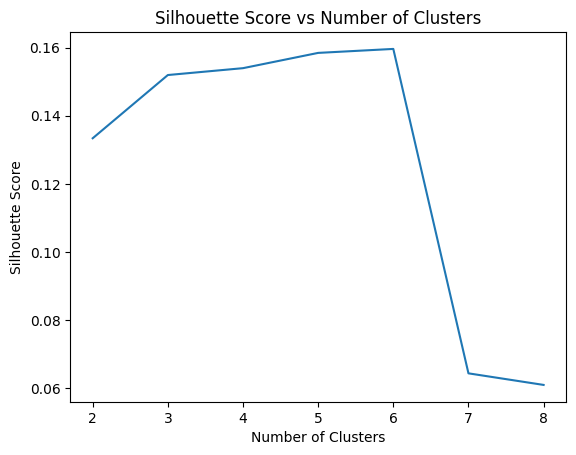

In [0]:
# Silhouette Scores K-Means

no_of_clusters = range(2, 9)
silhouette_scores = []

for n_cluster in no_of_clusters:
    kmeans = KMeans(n_clusters=n_cluster, random_state=1, init="k-means++").fit(coffee_spend)
    label = kmeans.labels_
    silhouette_coeff = silhouette_score(coffee_spend, label, metric="euclidean")
    silhouette_scores.append(silhouette_coeff)

plt.plot(no_of_clusters, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

/databricks/python/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited postprocessing with accuracies 
[3.80503712e-15 2.11416338e-06 1.24580255e-05]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(
/databricks/python/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/databricks/python/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:371: RuntimeWarning: overflow encountered in multiply
  distances = -2 * safe_sparse_dot(X, Y.T, dense_output=True)
/databricks/python/lib/python3.10/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/databricks/python/lib/python3.10/site-packages/sk

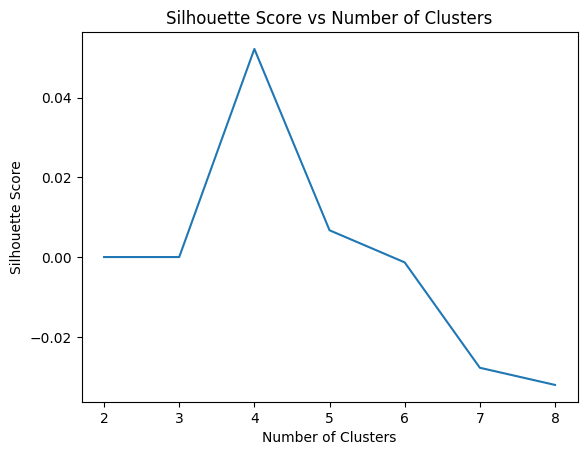

In [0]:
# Silhouette Scores Spectral Clustering

no_of_clusters = range(2, 9)
silhouette_scores = []

for n_cluster in no_of_clusters:
    spectral = SpectralClustering(n_clusters=n_cluster, random_state=1, assign_labels='kmeans').fit(coffee_spend)
    labels = spectral.labels_
    if len(np.unique(labels)) > 1:  # Check if there's more than one cluster
        silhouette_coeff = silhouette_score(coffee_spend, labels, metric="euclidean")
        silhouette_scores.append(silhouette_coeff)
    else:
        silhouette_scores.append(0)  # Assign 0 if only one cluster is found

plt.plot(no_of_clusters, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


In [0]:
# Error code
# # Silhouette Scores K-SpectralClustering

# no_of_clusters = range(2, 9)
# silhouette_scores = []

# for n_cluster in no_of_clusters:
#     spectral = SpectralClustering(n_clusters=n_cluster, random_state=1).fit(coffee_spend)
#     label = spectral.labels_
#     silhouette_coeff = silhouette_score(coffee_spend, label, metric="euclidean")
#     silhouette_scores.append(silhouette_coeff)

# plt.plot(no_of_clusters, silhouette_scores)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score vs Number of Clusters')
# plt.show()

/databricks/python/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited at iteration 39 with accuracies 
[3.68972366e-12 1.24869545e-05 9.67972899e-06 1.06994155e-05
 4.42338412e-06 8.01563940e-06]
not reaching the requested tolerance 1e-05.
Use iteration 39 instead with accuracy 
7.550854360283779e-06.

  _, diffusion_map = lobpcg(
/databricks/python/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited postprocessing with accuracies 
[1.46308254e-14 1.24869517e-05 9.67972997e-06 1.06994170e-05
 4.42338566e-06 8.01563961e-06]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(
/databricks/python/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in

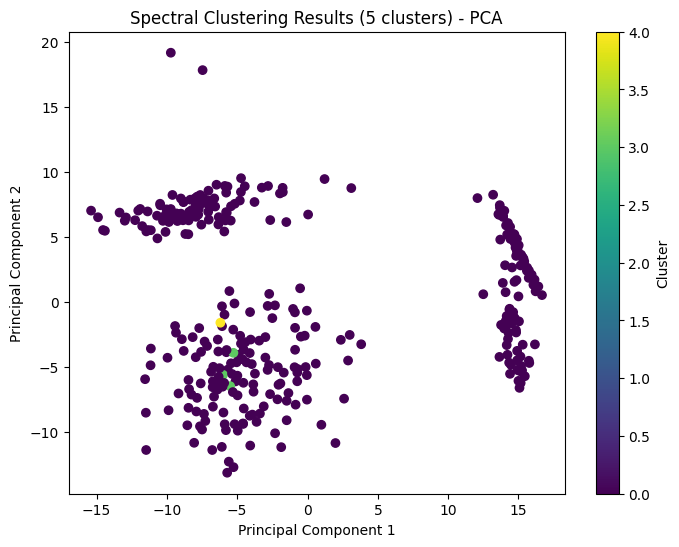

In [0]:

# Fit the spectral clustering model
spectral_cluster_5_clusters = SpectralClustering(n_clusters=5, random_state=1).fit(coffee_spend)

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(coffee_spend)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=spectral_cluster_5_clusters.labels_, cmap='viridis')
plt.title('Spectral Clustering Results (5 clusters) - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()



/databricks/python/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited at iteration 39 with accuracies 
[3.68972366e-12 1.24869545e-05 9.67972899e-06 1.06994155e-05
 4.42338412e-06 8.01563940e-06]
not reaching the requested tolerance 1e-05.
Use iteration 39 instead with accuracy 
7.550854360283779e-06.

  _, diffusion_map = lobpcg(
/databricks/python/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited postprocessing with accuracies 
[1.46308254e-14 1.24869517e-05 9.67972997e-06 1.06994170e-05
 4.42338566e-06 8.01563961e-06]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(
/databricks/python/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in

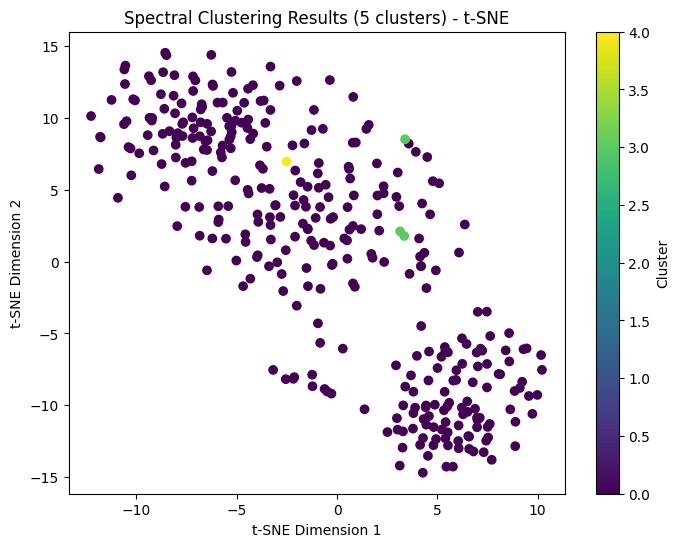

In [0]:
spectral_cluster_5_clusters = SpectralClustering(n_clusters=5, random_state=1).fit(coffee_spend)

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=1)
tsne_result = tsne.fit_transform(coffee_spend)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=spectral_cluster_5_clusters.labels_, cmap='viridis')
plt.title('Spectral Clustering Results (5 clusters) - t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')

plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4d6f2f2710>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

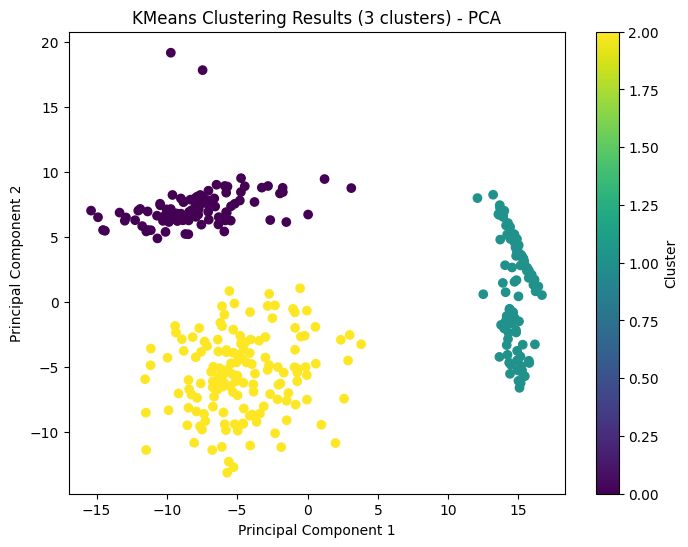

In [0]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(coffee_spend)

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(coffee_spend)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering Results (3 clusters) - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [0]:
%sql
SELECT
  amount,
  count(amount) as nums
FROM
  coffee_spend
GROUP BY
  amount
ORDER BY
  nums DESC


amount,nums
-5.7,629
-5.4,433
-5.0,361
-5.8,341
-6.5,335
-5.65,335
-5.35,298
-7.5,283
-5.5,280
-6.15,257


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4d6dc19f30>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

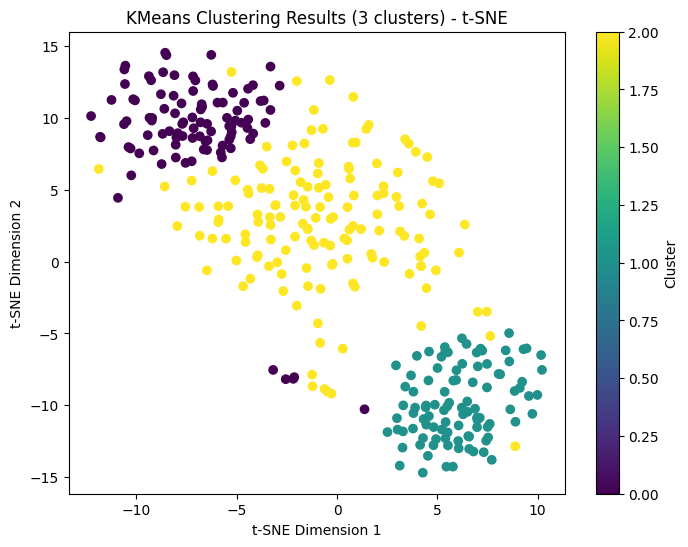

In [0]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(coffee_spend)

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=1)
tsne_result = tsne.fit_transform(coffee_spend)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering Results (3 clusters) - t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4d6dd4f130>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


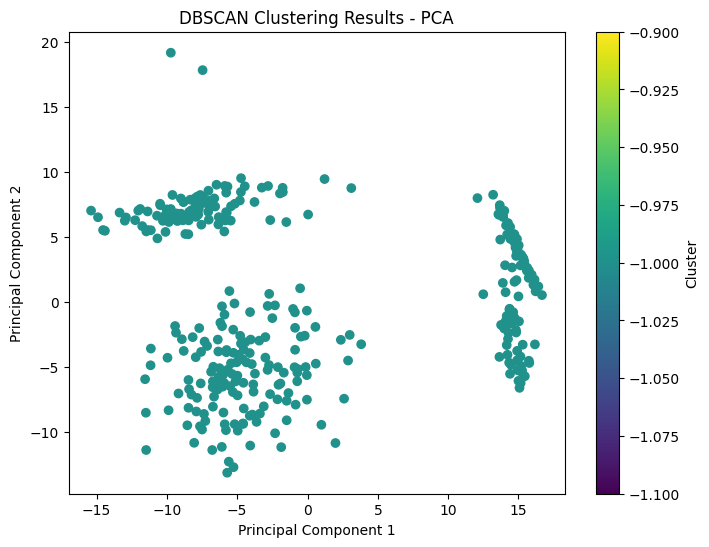

In [0]:
# Fit the DBSCAN clustering model
dbscan = DBSCAN(eps=0.5, min_samples=3).fit(coffee_spend)

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(coffee_spend)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering Results - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4d776ed2d0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
/databricks/python/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will chang

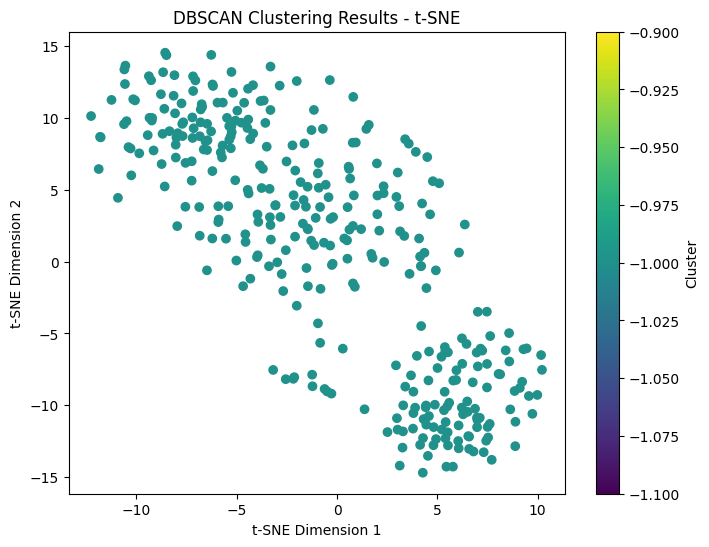

In [0]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Fit the DBSCAN clustering model
dbscan = DBSCAN(eps=0.5, min_samples=3).fit(coffee_spend)

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=1)
tsne_result = tsne.fit_transform(coffee_spend)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering Results - t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()


In [0]:
print(coffee_spend)

[[0.   0.   0.   ... 0.   0.   6.15]
 [6.7  0.   0.   ... 0.   0.   0.  ]
 [0.   0.   6.9  ... 0.   0.   5.6 ]
 ...
 [0.   0.   0.   ... 0.   0.   4.7 ]
 [0.   0.   0.   ... 0.   0.   6.35]
 [0.   7.8  6.05 ... 0.   0.   0.  ]]


#OLD Work

## Feature Engineering

In [0]:
%sql
CREATE OR REPLACE VIEW eng_account AS
SELECT
  account_id,
  ROUND(AVG(amount), 2) AS average_spend,
  ROUND(SUM(amount), 2) AS total_spend,
  COUNT(*) AS total_transact
FROM
  simulated_transaction_2024_csv
WHERE 
  account_id IS NOT NULL
GROUP BY
  account_id


In [0]:
%sql
CREATE OR REPlACE TEMP VIEW fin_table AS
SELECT
  sim.account_id,
  balance,
  amount,
  -- CAST(external_account_desc AS STRING) AS external_account_desc, 
  -- REPLACE(external_account_desc, ' ', '_') AS external_account_desc,
  CASE LOWER(external_account_desc)
    WHEN 'Amazon' THEN 'amazon_sub'
    WHEN 'AMAZON' THEN 'amazon_purchase'
    ELSE REPLACE(REPLACE(LOWER(external_account_desc), "'", ''), ' ', '_') END AS external_account_desc,
  MODE() WITHIN GROUP (ORDER BY time_stamp) AS most_common_time,
  eng.average_spend,
  eng.total_spend,
  eng.total_transact
FROM
  simulated_transaction_2024_csv sim
LEFT JOIN
  eng_account eng
ON
  sim.account_id = eng.account_id
WHERE 
  sim.account_id IS NOT NULL 
  AND external_account_desc IS NOT NULL
  AND sim.time_stamp IS NOT NULL
GROUP BY 
  sim.account_id,
  external_account_desc,
  balance,
  amount,
  eng.average_spend,
  eng.total_spend,
  eng.total_transact

In [0]:
%sql
SELECT
  DISTINCT
  external_account_desc
FROM  
  fin_table

external_account_desc
five_senses_art
matalan
halifax
tesco
barbiee_boutique
university_college_hospital
blackwells
lbg
selfridges
revella


In [0]:
df = spark.table('fin_table').toPandas()

In [0]:
df['most_common_minutes'] = df['most_common_time'].apply(lambda x: int(x[:2]) * 60 + int(x[3:]))